In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
df=pd.read_csv('/kaggle/input/health-insurace/insurance.csv')
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.isnull().sum() #checking for null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/tmp/ipykernel_32/1046926227.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


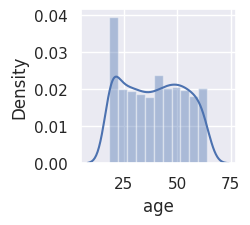

In [16]:
#checking distribution for age column
sns.set()
plt.figure(figsize=(2,2))
sns.distplot(df['age'])
plt.show()

In [17]:
#checking distribution for sex column
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

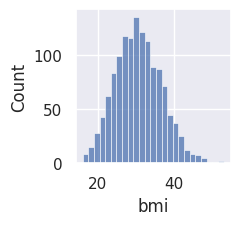

In [18]:
#distribution of bmi
sns.set()
plt.figure(figsize=(2,2))
sns.histplot(df['bmi'])
plt.show()

In [19]:
#counting number of children
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64


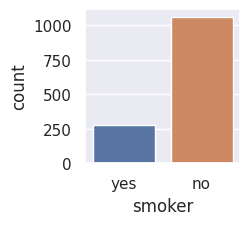

In [20]:
#smoker distribution
print(df['smoker'].value_counts())
#or
plt.figure(figsize=(2,2))
sns.countplot(x='smoker',data=df)
plt.show()

In [21]:
#region distribution
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

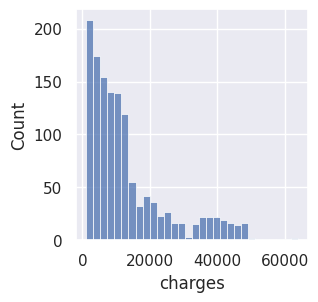

In [22]:
#charge distribution
plt.figure(figsize=(3,3))
sns.histplot(x='charges',data=df)
plt.show()

<Axes: >

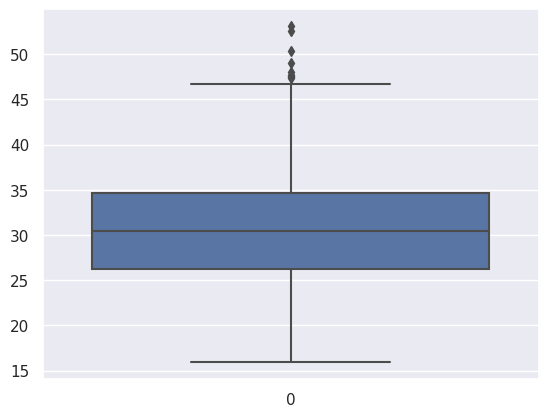

In [26]:
sns.boxplot(df.bmi) #checking for outliers

In [5]:
iqr=df.bmi.quantile(0.75)-df.bmi.quantile(0.25) #q=q3-q1
print('Interquartile range=',iqr)
upperlimit=df.bmi.quantile(0.75)+iqr*1.5
print('Upper Limit=',upperlimit)
lowerlimit=df.bmi.quantile(0.25)-iqr*1.5
print('Lower Limit=',lowerlimit)

Interquartile range= 8.3975
Upper Limit= 47.290000000000006
Lower Limit= 13.7


<Axes: >

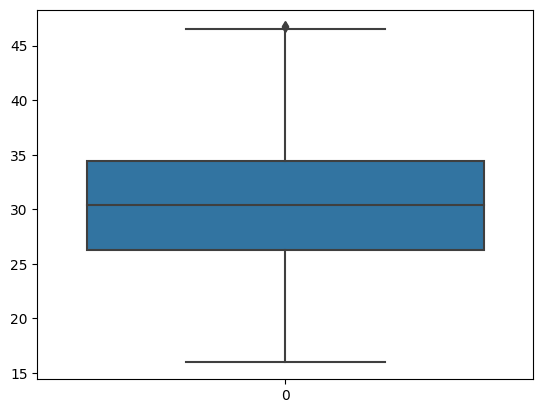

In [6]:
med=df.bmi.median()
df.bmi=np.where(df.bmi>upperlimit,med,df.bmi)
sns.boxplot(df.bmi) #outliers removed

In [17]:
#replacing categorical columns to numerical columns
df.replace({'smoker':{'yes':1,'no':0},'sex':{'male':0,'female':1}},inplace=True)
ohe=OneHotEncoder()
features_array=ohe.fit_transform(df[['region']]).toarray()
labels=ohe.categories_
features=np.array(labels).ravel()
print(features)
features=pd.DataFrame(features_array,columns=features)

['northeast' 'northwest' 'southeast' 'southwest']


In [25]:
df1=pd.concat([df,features],axis=1)
df1.drop(columns='region',axis=1,inplace=True)
df1.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [27]:
x=df1.drop(columns='charges',axis=1)
y=df1.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
#Splitting between training and testing data

train_X,test_X,train_y,test_y=train_test_split(x,y,random_state=2,test_size=0.2)
print(x.shape,train_X.shape,test_X.shape)

(1338, 9) (1070, 9) (268, 9)


In [29]:
#using Machine Learning model
model=LinearRegression()
model.fit(train_X.values,train_y.values)


LinearRegression()

In [31]:
prediction=model.predict(test_X)
r_test=metrics.r2_score(test_y,prediction)
r_test

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7473508749250467

In [30]:
prediction1=model.predict(train_X)
r_test=metrics.r2_score(train_y,prediction1)
r_test

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7494730816338498

In [33]:
df1.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


In [38]:

#age=int(input('Enter the age='))
#sex=int(input('Enter sex (1 for female and 0 for male=)'))
#bmi=float(input('Enter Bmi='))
#children=int(input('Enter number of children='))
#smoker=int(input('Enter whether you are a smoker (1 for yes and 0 for no)='))
#region=int(input('Enter region (southeast:0,southwest:1,northeast:2,northwest:3)='))
t=(28,0,33.000, 3, 0, 0, 0, 1, 0)
nparr=np.asarray(t)
nparr2=nparr.reshape(1,-1)
pred=model.predict(nparr2)
print(pred)

[7315.68170359]
